# Koe-Meyer Inc. Supplier Rationalization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Turn off warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
data = pd.read_csv('data.csv')

data.head(10)

,No.,Category,Supplier,Total Spend,Geo-Coverage,Available Capacity,Switching Costs,Substitution Options,Savings Opportunity,Integrated Solutions,Leadership,Innovation,Technology,Compilance,Customer Services
0,1.0,Office Supplies,OFFICE INC,"$2,072,047",1.0,5.0,5.0,6.0,2.0,5.0,8.0,5.0,5.0,6.0,6.0
1,2.0,Office Supplies,STAPLES & SCHOKS,"$1,340,109",8.0,9.0,6.0,10.0,10.0,4.0,9.0,10.0,9.0,10.0,7.0
2,3.0,Office Supplies,INDO-OFF,"$1,306,916",3.0,2.0,3.0,5.0,4.0,6.0,7.0,6.0,6.0,5.0,4.0
3,4.0,Office Supplies,TWIST & SHINE PRODUCTS,"$390,824",9.0,3.0,8.0,7.0,7.0,3.0,6.0,3.0,7.0,3.0,1.0
4,5.0,Office Supplies,GUERNSEY BEST PRODUCTS,"$359,192",8.0,4.0,6.0,3.0,2.0,5.0,3.0,2.0,4.0,5.0,4.0
5,6.0,Office Supplies,MY OFFICE,"$313,967",4.0,9.0,10.0,3.0,4.0,2.0,3.0,3.0,9.0,4.0,10.0
6,7.0,Office Supplies,OFFICE OFFICE,"$227,992",1.0,6.0,2.0,9.0,7.0,8.0,9.0,9.0,1.0,10.0,5.0
7,8.0,Office Supplies,GREEN OFFICE,"$188,284",3.0,9.0,2.0,7.0,1.0,3.0,10.0,9.0,4.0,4.0,7.0
8,9.0,Office Supplies,OFFICE ADVANTAGE,"$164,066",3.0,7.0,5.0,2.0,7.0,4.0,9.0,9.0,10.0,10.0,1.0
9,10.0,Office Supplies,GRAND,"$144,255",4.0,6.0,5.0,3.0,3.0,5.0,8.0,6.0,6.0,8.0,5.0


In [3]:
# Trim the whitespace on ' Total Spend ' column name
data.columns = data.columns.str.strip()

# Remove NaN rows
data = data.dropna()

In [4]:
# Convert 'Total Spend' to int
data['Total Spend'] = data['Total Spend'].str.replace('$', '')
data['Total Spend'] = data['Total Spend'].str.replace(',', '')
data['Total Spend'] = data['Total Spend'].astype(int)

In [5]:
legal = data[data['Category'] == 'Legal Services']
office_supplies = data[data['Category'] == 'Office Supplies']
labor = data[data['Category'] == 'Contingent Labor']

## Part 1: Current Status Evaluation

#### (1) For each category (Office Supplies, Contingent Labor, Legal Services), create a bar chart with respect to the total spend by each supplier. What do you observe? 

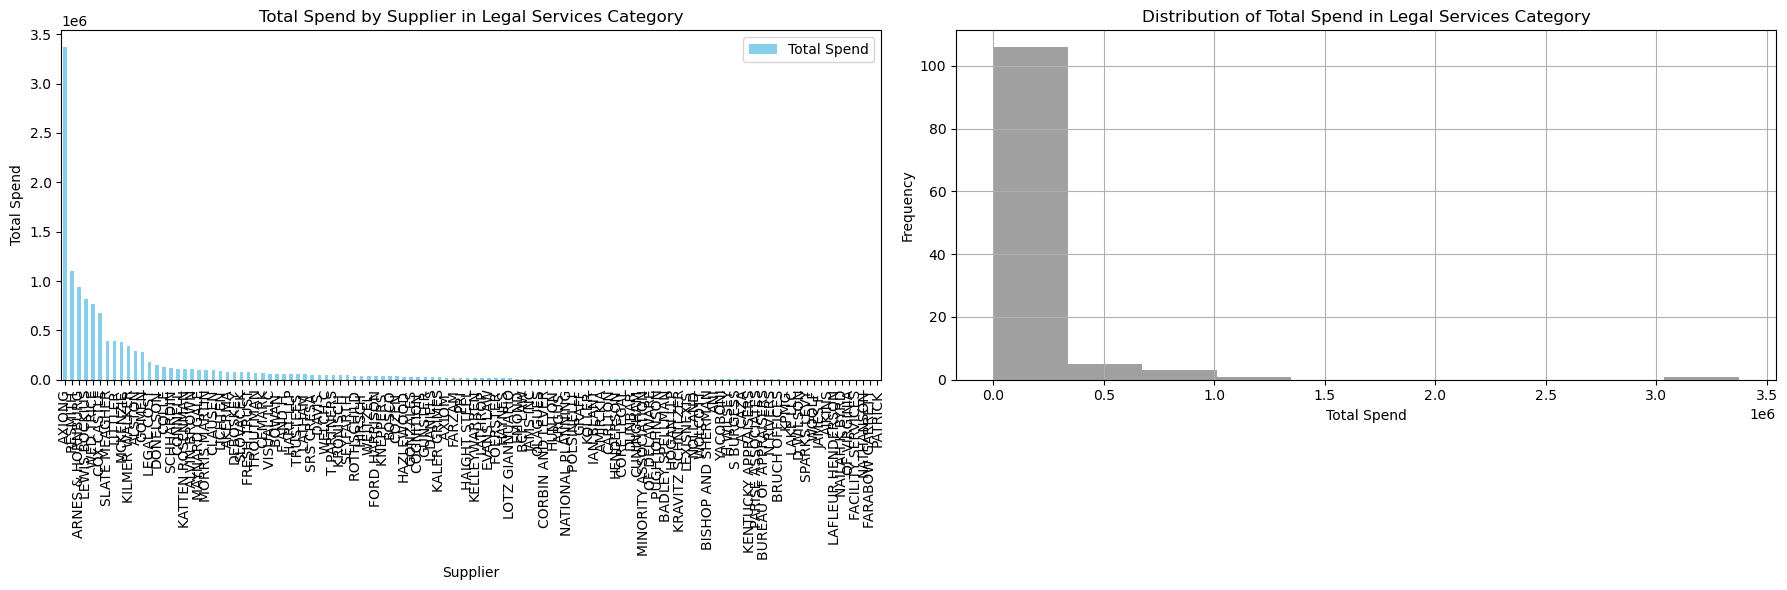

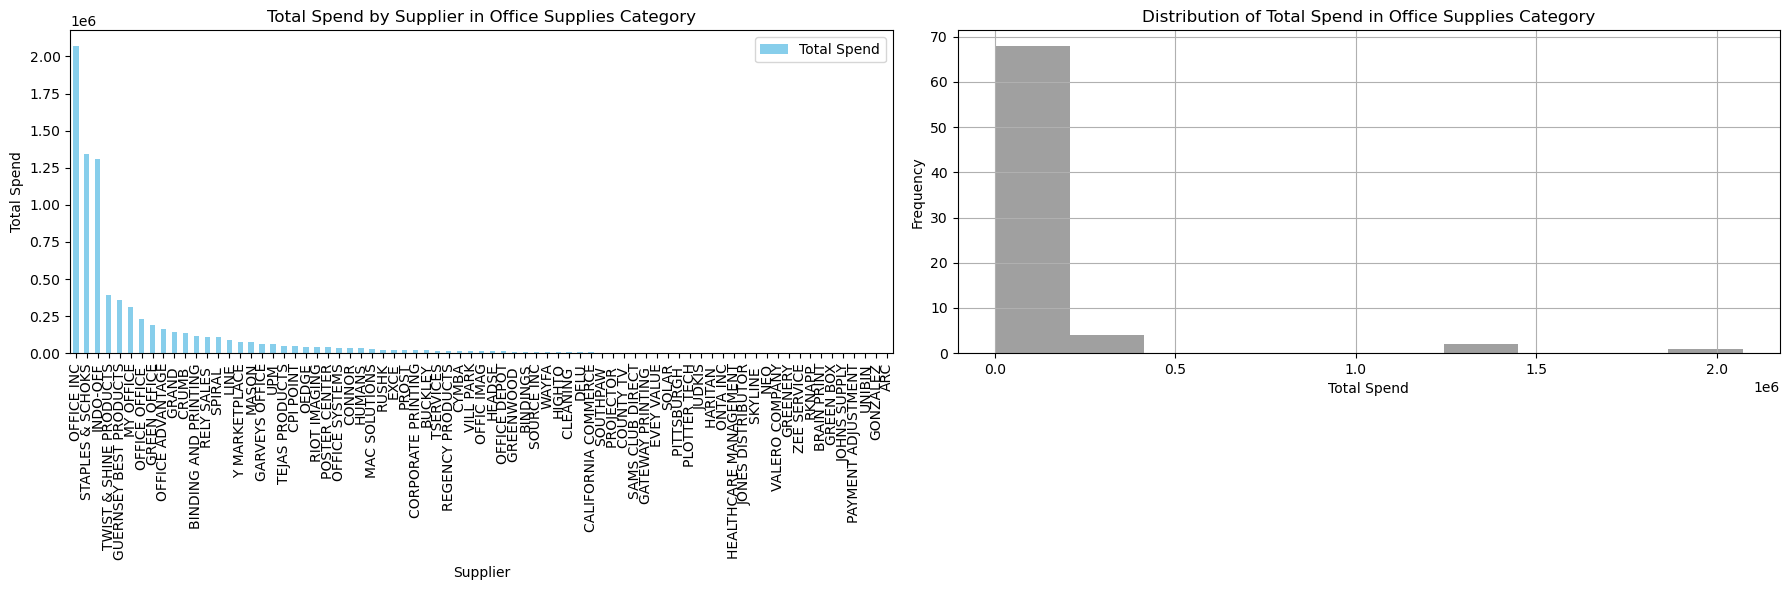

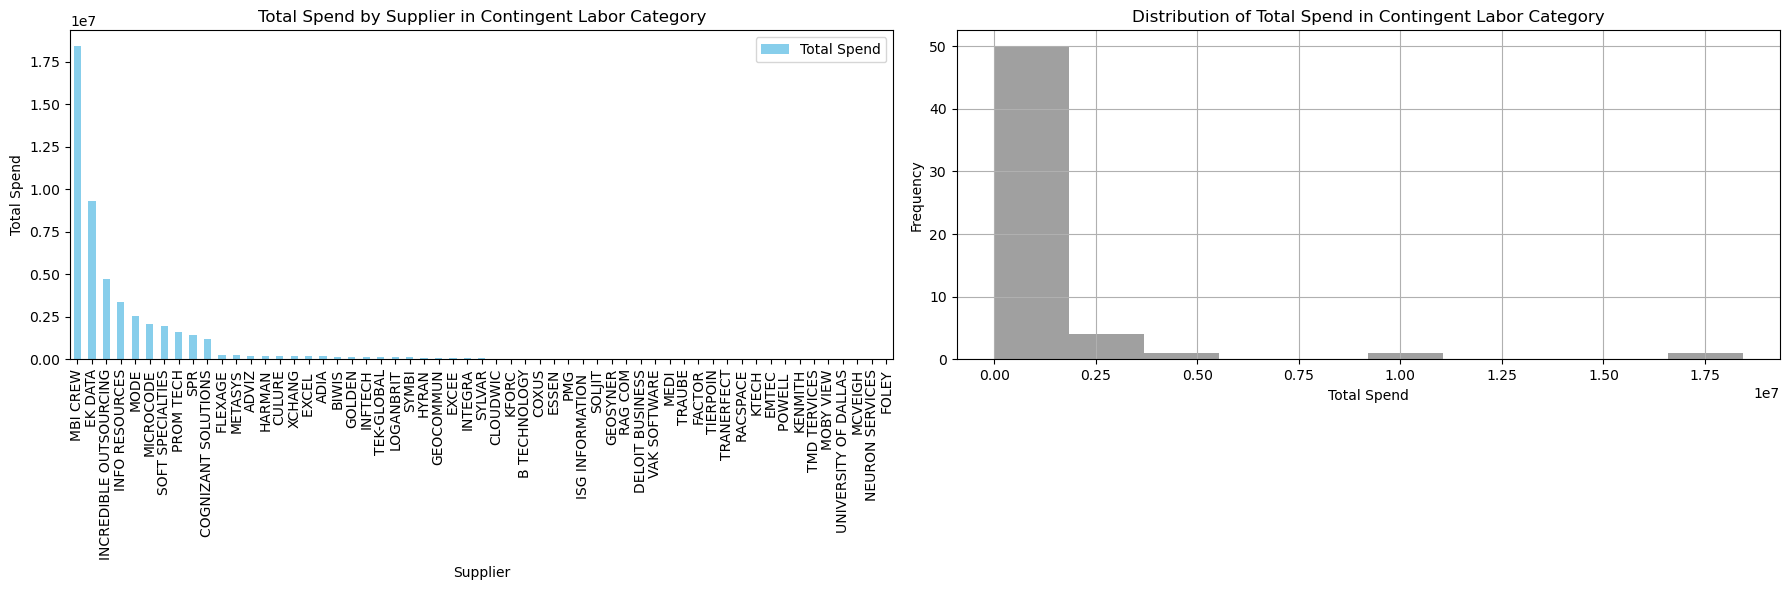

In [6]:
def plot_bars(df, category_name):
    # Rank and sort the suppliers based on 'Total Spend'
    sorted_data = df.sort_values('Total Spend', ascending=False)

    # Create a figure with subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))  

    # Plotting the bar chart for Total Spend by Supplier
    sorted_data.plot(kind='bar', x='Supplier', y='Total Spend', color='skyblue', ax=ax[0])
    ax[0].set_title(f'Total Spend by Supplier in {category_name} Category')
    ax[0].set_xlabel('Supplier')
    ax[0].set_ylabel('Total Spend')
    ax[0].tick_params(axis='x', rotation=90)  

    # Creating the histogram for Distribution of Total Spend
    ax[1].hist(sorted_data['Total Spend'], bins=10, color='gray', alpha=0.75)
    ax[1].set_title(f'Distribution of Total Spend in {category_name} Category')
    ax[1].set_xlabel('Total Spend')
    ax[1].set_ylabel('Frequency')
    ax[1].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# Assuming data frames for each category are named as follows:
# legal_df, office_supplies_df, labor_df

plot_bars(legal, "Legal Services")
plot_bars(office_supplies, "Office Supplies")
plot_bars(labor, "Contingent Labor")

The most notable observation for each category is that a few suppliers account for a significant portion of expenditures, indicating dependency on these suppliers or potential areas for cost-saving negotiations.

#### (2) For each category (Office Supplies, Contingent Labor, Legal Services), create a strategic matrix plot using geographic coverage against total spend and populate data of the suppliers. What do you find from each plot?

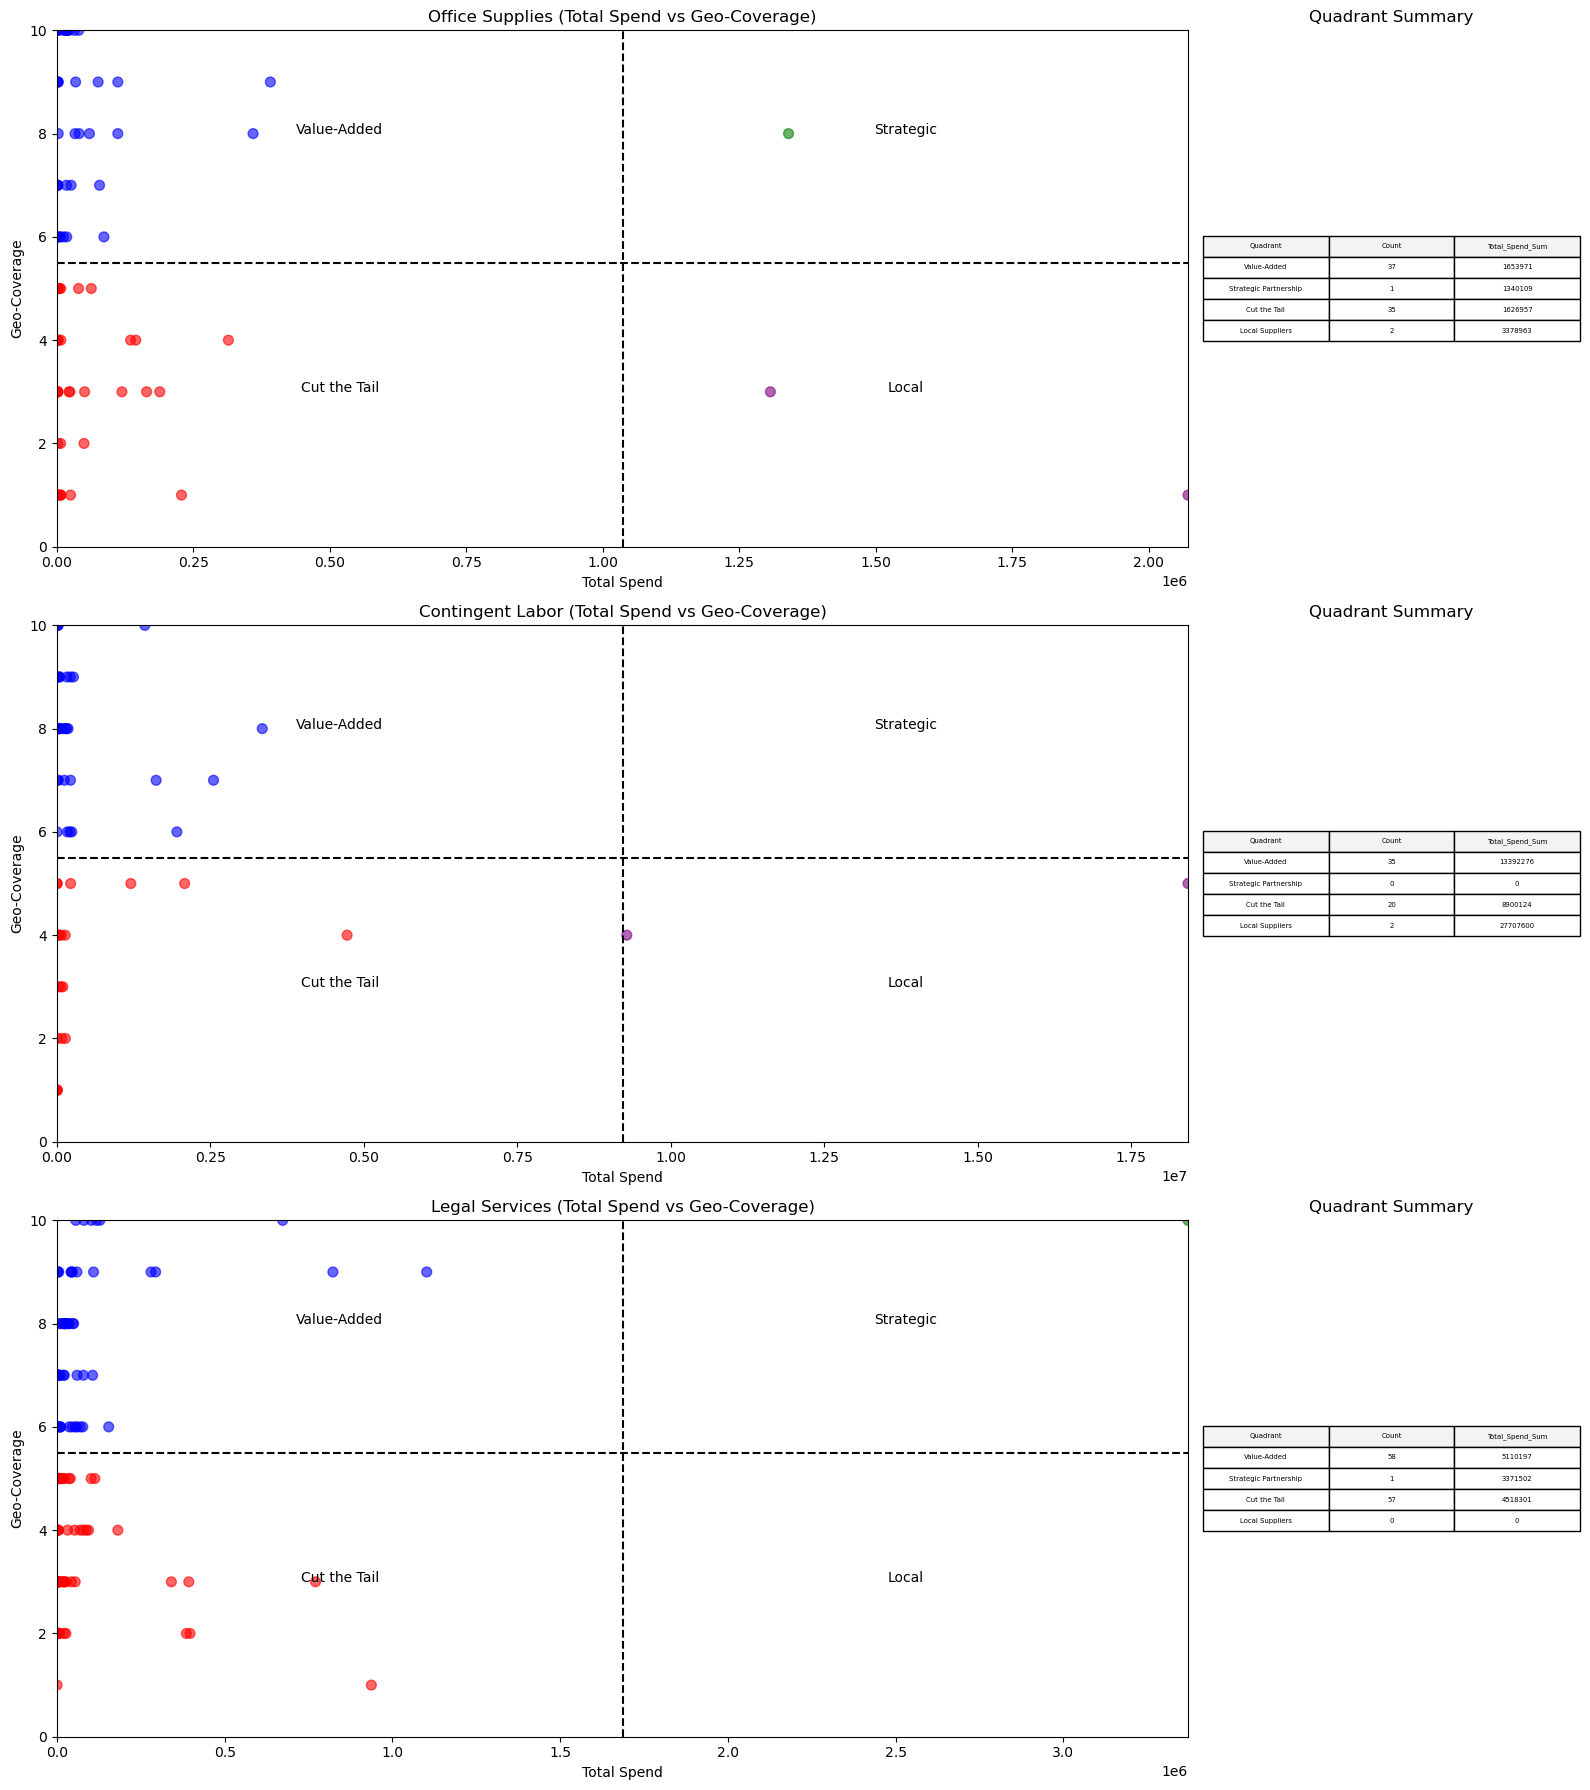

In [7]:
def strategic_matrix_plots_and_tables(dataframes, category_names, geo_column, total_spend_column):
    num_categories = len(dataframes)
    fig, axes = plt.subplots(num_categories, 2, figsize=(16, 6 * num_categories), gridspec_kw={'width_ratios': [3, 1]})

    for i, df in enumerate(dataframes):
        if geo_column not in df.columns or total_spend_column not in df.columns:
            print(f"Error: Specified columns do not exist in the DataFrame for {category_names[i]}.")
            continue

        max_spend_half = df[total_spend_column].max() / 2
        scatter_ax = axes[i][0]
        table_ax = axes[i][1]

        # Classifying suppliers into quadrants for coloring and analysis
        conditions = [
            (df[total_spend_column] <= max_spend_half) & (df[geo_column] > 5.5),
            (df[total_spend_column] > max_spend_half) & (df[geo_column] > 5.5),
            (df[total_spend_column] <= max_spend_half) & (df[geo_column] <= 5.5),
            (df[total_spend_column] > max_spend_half) & (df[geo_column] <= 5.5)
        ]
        colors = ['blue', 'green', 'red', 'purple']  # Different color for each quadrant
        choices = ['Value-Added', 'Strategic Partnership', 'Cut the Tail', 'Local Suppliers']
        df['Quadrant'] = np.select(conditions, choices, default='Not Categorized')
        df['Color'] = np.select(conditions, colors)

        # Scatter plot with colors based on quadrant
        scatter = scatter_ax.scatter(df[total_spend_column], df[geo_column], color=df['Color'], alpha=0.6, s=50)
        scatter_ax.axvline(x=max_spend_half, color='black', linestyle='--')
        scatter_ax.axhline(y=5.5, color='black', linestyle='--')
        scatter_ax.text(max_spend_half / 2, 8, 'Value-Added', fontsize=10, ha='center')
        scatter_ax.text(3 * max_spend_half / 2, 8, 'Strategic', fontsize=10, ha='center')
        scatter_ax.text(max_spend_half / 2, 3, 'Cut the Tail', fontsize=10, ha='center')
        scatter_ax.text(3 * max_spend_half / 2, 3, 'Local', fontsize=10, ha='center')
        scatter_ax.set_title(f'{category_names[i]} (Total Spend vs {geo_column})')
        scatter_ax.set_xlabel(total_spend_column)
        scatter_ax.set_xlim([0, df[total_spend_column].max()])
        scatter_ax.set_ylim([0, 10])
        scatter_ax.set_ylabel(geo_column)

        # Prepare data for the table
        quadrant_summary = df.groupby('Quadrant').agg(
            Count=('Supplier', 'count'),
            Total_Spend_Sum=('Total Spend', 'sum')
        ).reindex(choices, fill_value=0)

        # Plot table
        table_ax.axis('off')
        table_data = quadrant_summary.reset_index().values
        table_ax.table(cellText=table_data, colLabels=quadrant_summary.columns.insert(0, 'Quadrant'), cellLoc='center', loc='center', colColours=['#f3f3f3']*3)
        table_ax.set_title('Quadrant Summary')

    plt.tight_layout()
    plt.show()

# Example usage
dataframes = [office_supplies, labor, legal]
categories = ["Office Supplies", "Contingent Labor", "Legal Services"]
strategic_matrix_plots_and_tables(dataframes, categories, 'Geo-Coverage', 'Total Spend')


By organizing the data in this way it can be determined that 35-50% of suppliers by number and 20-35% by total spend far into the 'Cut the Tail' category. Very few, if any, fall into the 'Strategic Partnership' or 'Local Supplier' category due to relatively low levels of spending per supplier. Thus, we determine that a large number of suppliers could potentially be cut and have their spend redistributed to other suppliers.

#### (3) Other than geographic coverage, what are the other metrics you would take into consideration in terms of supplier rationalization? Calculate the weighted average score for criticality and quality. For each of these metrics, create a strategic matrix plots against total spend by populating the data. What can you tell from the plots? Create a strategic matrix plot populating criticality against quality for each category. What insights do the plots provide? 

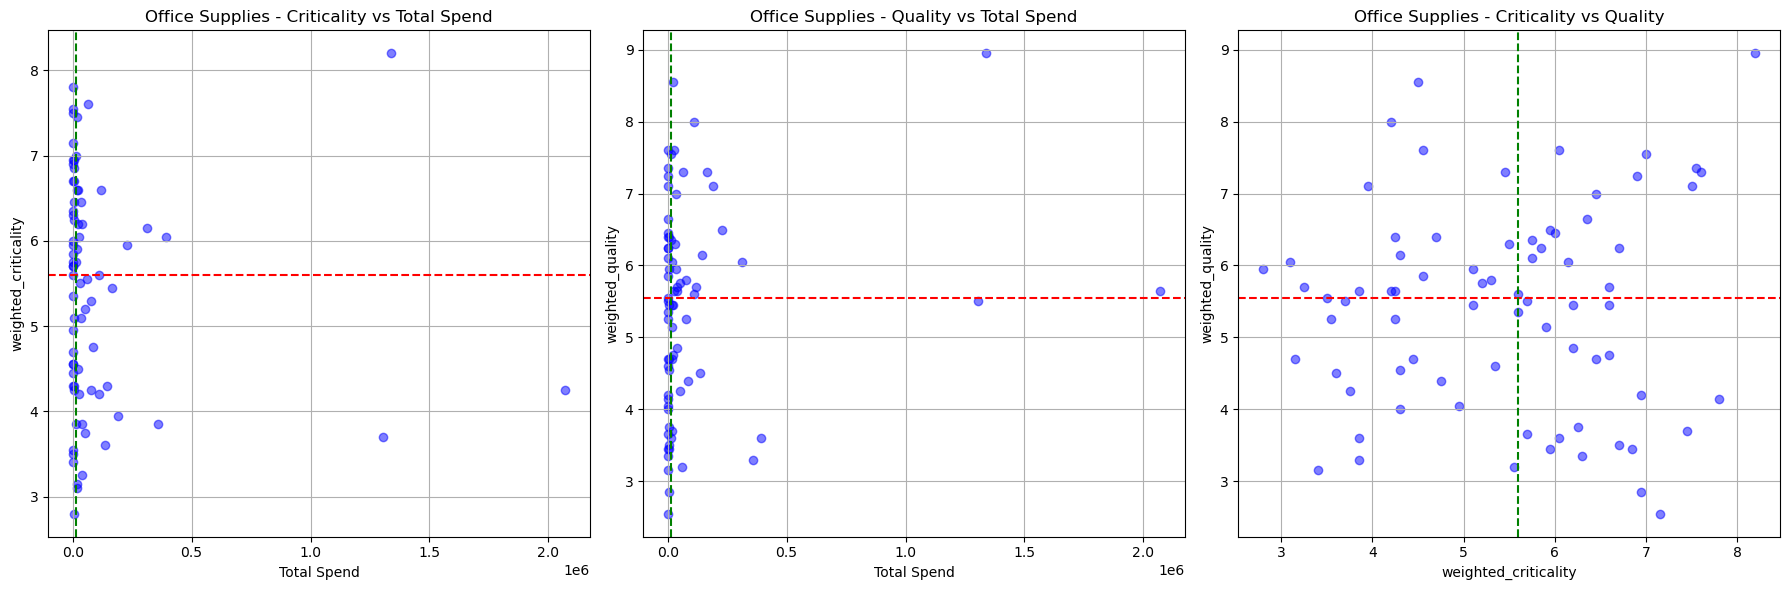

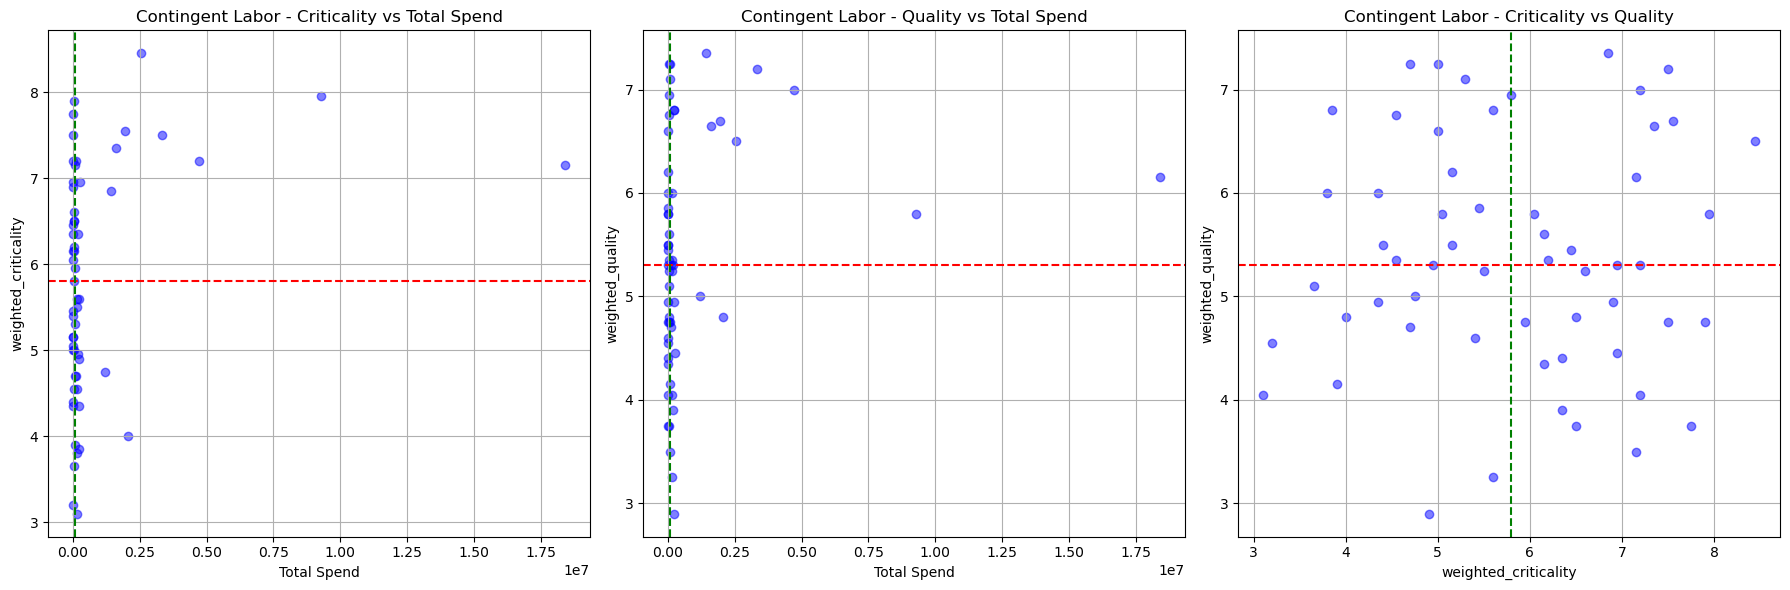

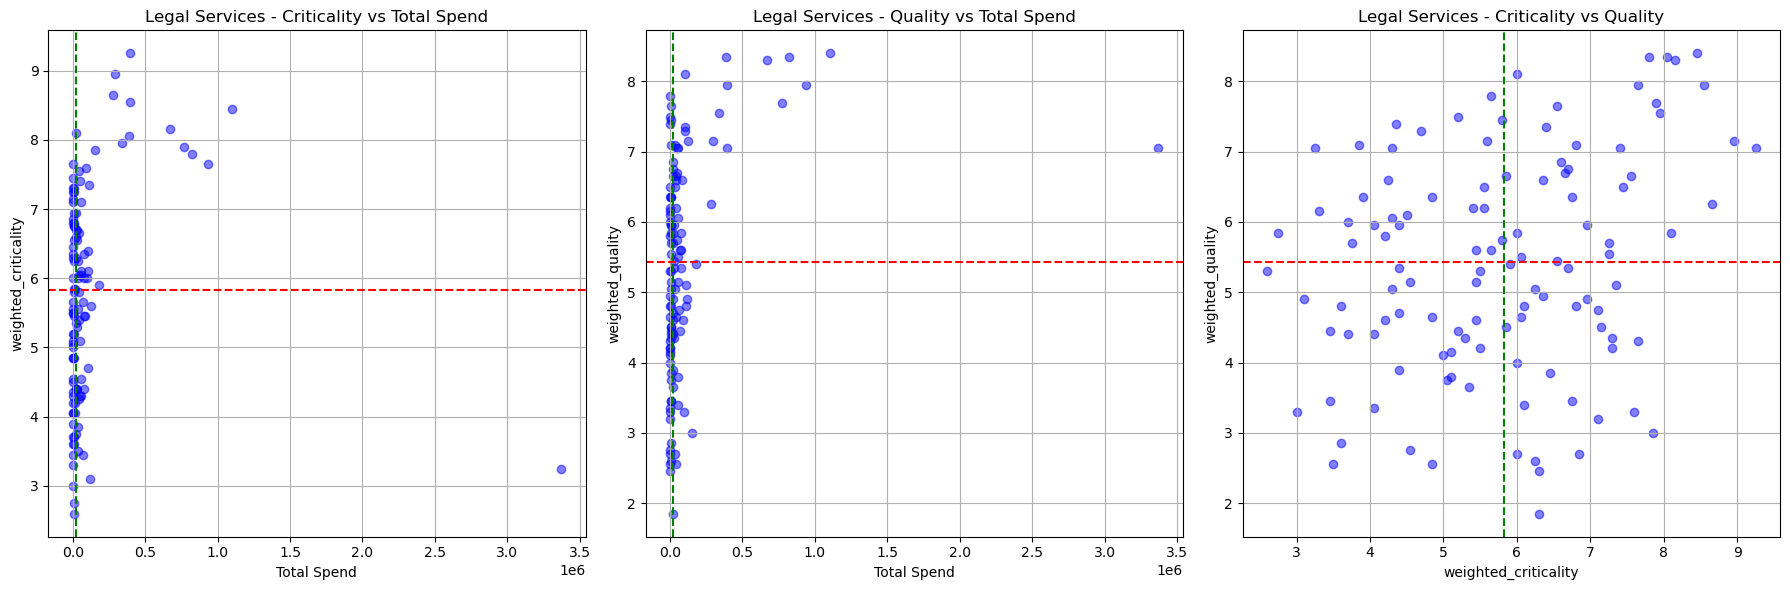

In [8]:
# Create functions to apply weights to features of supplier criticality and supplier quality
# The functions will add a new column to the dataframe given as the argument
# Once done, use the matrix plotting function and give the new columns as the argument
# to plot vs Total Spend

def weight_criticality(df):
    df['weighted_criticality'] = (df['Available Capacity'] * 0.2 + df['Switching Costs'] * 0.25 +
                                  df['Substitution Options'] * 0.15 + df['Savings Opportunity'] * 0.3 +
                                  df['Integrated Solutions'] * 0.1)

def weight_quality(df):
    df['weighted_quality'] = (df['Leadership'] * 0.1 + df['Innovation'] * 0.35 +
                              df['Technology'] * 0.2 + df['Compilance'] * 0.1 +
                              df['Customer Services'] * 0.25)

def plot_strategic_matrix(data, category_names):
    for category_name in category_names:
        category_data = data[data['Category'] == category_name]
        
        # Setting up the figure and axes
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # three plots per category

        metrics_pairs = [
            ('Total Spend', 'weighted_criticality', "Criticality vs Total Spend"),
            ('Total Spend', 'weighted_quality', "Quality vs Total Spend"),
            ('weighted_criticality', 'weighted_quality', "Criticality vs Quality")
        ]
        
        for i, (x, y, title) in enumerate(metrics_pairs):
            ax = axes[i]
            ax.scatter(category_data[x], category_data[y], color='blue', alpha=0.5)
            ax.set_title(f'{category_name} - {title}')
            ax.set_xlabel(x)
            ax.set_ylabel(y)
            ax.axhline(category_data[y].median(), color='red', linestyle='--')
            ax.axvline(category_data[x].median(), color='green', linestyle='--')
            ax.grid(True)
        
        plt.tight_layout()
        plt.show()

# Apply the weights to the data
weight_criticality(data)
weight_quality(data)

# Category names for plotting
categories = data['Category'].unique()
plot_strategic_matrix(data, categories)


## Part 2: Strategy Recommendation and Justification

#### (4) How do different characteristics of the three categories (Office Supplies, Contingent Labor, and Legal Services) influence your viewpoint on supplier rationalization? Compare the categories and discuss the differences. 

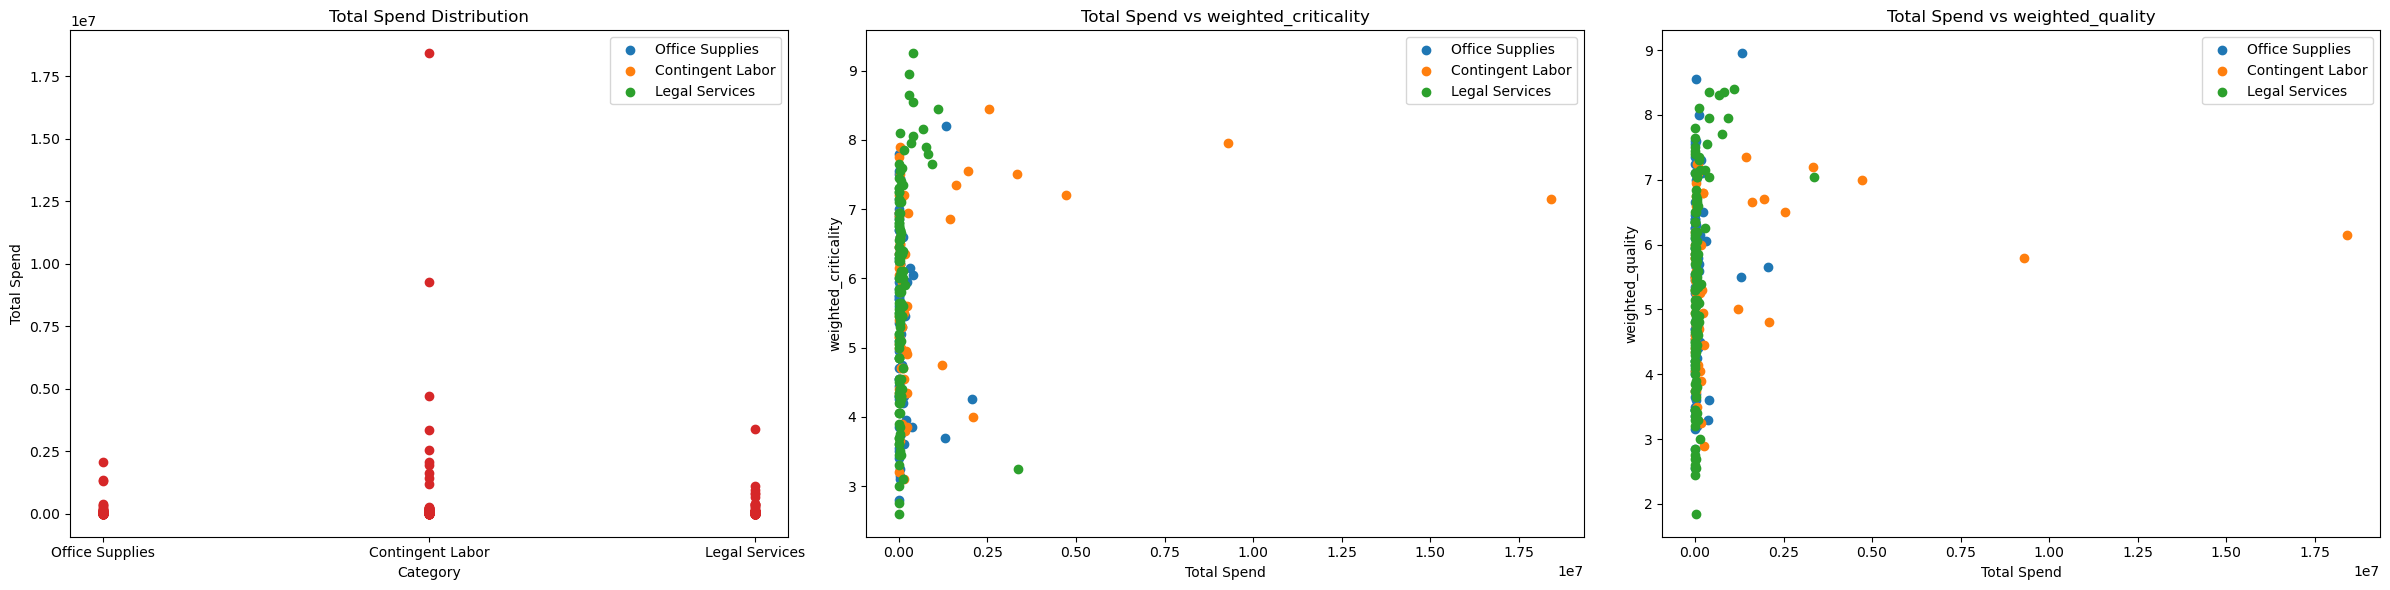

In [9]:
def plot_metrics_with_table(data):
    # Extending the metrics to include 'Total Spend' for correlation plots, excluding the empty last plot
    metrics = ['Total Spend', 'Geo-Coverage', 'weighted_criticality', 'weighted_quality']
    category_names = data['Category'].unique()

    # Create a figure with the correct number of subplots (1 row, 4 columns here)
    fig, axes = plt.subplots(1, len(metrics) - 1, figsize=(24, 6)) 

    # Plot correlations of Total Spend with other metrics
    for i, metric in enumerate(metrics[1:]):  
        for category in category_names:
            category_data = data[data['Category'] == category]
            axes[i].scatter(category_data['Total Spend'], category_data[metric], label=f"{category}")
            axes[i].set_title(f'Total Spend vs {metric}')
            axes[i].set_xlabel('Total Spend')
            axes[i].set_ylabel(metric)
            axes[i].legend()

    # Plot Total Spend distribution
    axes[0].scatter(data['Category'], data['Total Spend'])  
    axes[0].set_title('Total Spend Distribution')
    axes[0].set_xlabel('Category')
    axes[0].set_ylabel('Total Spend')

    plt.tight_layout()
    plt.show()

plot_metrics_with_table(data)



The visualizations highlight that while higher spending generally correlates with increased criticality and quality across all categories, there's notable variability in how much each dollar spent translates into perceived quality and criticality, especially in Office Supplies where high quality is maintained despite lower spends, suggesting potential areas for cost optimization and strategic supplier management.

#### (5) What is the number of suppliers you recommend for each category (1, 2 to 10, or more than 10)? Justify your answer by computing the savings opportunity and/or evaluating the key metrics you use and the pros and cons of your recommendation.